# Importing required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft
from IPython.display import Audio
import scipy.signal as sp
import soundfile as sf

#Generating vowel /u/ at two pitches(120 Hz and 220 Hz)

plot of vowel"u"
*****Pitch is 120Hz*****


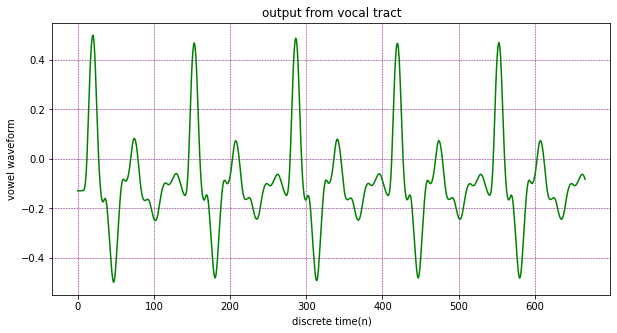

*****Pitch is 220Hz*****


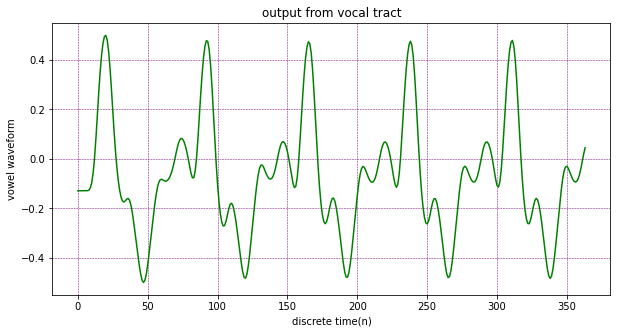

sound of vowel /u/ at pitch of 120Hz


sound of vowel /u/ at pitch of 220Hz


In [ ]:
"""Function for saving and playing sound generated"""

def save_as_wav(input,filename,samples):
  sf.write(filename+'.wav',input,samples,'PCM_24')
def play_sound(filename):
  audio=Audio(filename)
  display(audio)

"""Function for obtaining filter parameters"""
def angle_radius(F,B,Fs):
  T=1/Fs
  rad=np.exp(-np.pi*B*T)
  theta=2*np.pi*F*T
  return rad,theta

def filter_coeff(rad,theta):
  a=-2*rad*np.cos(theta)
  b=rad*rad
  return a,b




"""Function for generating glottal pulse and finding response of filter for for given input formants"""
def glottal_waveform(h,w,T_glottal,n,Fs):
  g=np.zeros(n.shape[0])     # for generating an array of all zeroes 
  cont_t_input=n/Fs
  dummy,cont_t=np.divmod(cont_t_input,T_glottal)  
  rise_cond=(cont_t<(w/2)).astype(int)
  fall_cond=np.logical_and((cont_t>(w/2)),(cont_t<w)).astype(int)
  g=rise_cond*(2*h*cont_t/w)+fall_cond*((-2*h*cont_t/w)+2*h)
  return g

""" Function for getting response of filter for given input"""
def Diff_eqn(x,a,b,plots=True):
  n_size=x.shape[0]
  n_axis=np.arange(n_size+2)
  new_x=np.zeros(n_size+2)
  y=np.zeros(n_size+2)
  new_x[2:n_size+2]=x
  for j in range(2,n_size+2):
    y[j]=1*new_x[j]-a*y[j-1]-b*y[j-2]
  if plots:
    plt.figure(figsize=(25,5))
    n_show=int(np.ceil(5*(Fs/F0)))
    plt.subplot(1,2,1)
    plt.plot(n_axis[0:n_show],new_x[0:n_show],'b')
    plt.title('input signal')
    plt.xlabel('discrete time(n)');plt.ylabel('input x(n)')
    plt.grid(color='purple',linestyle='--',linewidth=0.5)
    plt.subplot(1,2,2)
    plt.plot(n_axis[0:n_show],y[0:n_show],'r')
    plt.title('output signal')
    plt.xlabel('discrete time(n)');plt.ylabel('output y(n)')
    plt.grid(color='purple',linestyle='--',linewidth=0.5)
    plt.show()
  return y


"""Function for obtaining output for 3 formant frequencies of vowel /u/"""
def vowel_filtering(F1,B1,F2,B2,F3,B3,F0,g,Fs,plots=True):
  rad1,theta1=angle_radius(F1,B1,Fs)
  a1,b1=filter_coeff(rad1,theta1)
  y1=Diff_eqn(g,a1,b1,False)
  rad1,theta1=angle_radius(F2,B2,Fs)
  a1,b1=filter_coeff(rad1,theta1)
  y2=Diff_eqn(y1,a1,b1,False)
  rad1,theta1=angle_radius(F3,B3,Fs)
  a1,b1=filter_coeff(rad1,theta1)
  y3=Diff_eqn(y2,a1,b1,False)
  y_final=(y3-np.min(y3))/(np.max(y3)-np.min(y3))
  y_final=y_final-0.5
  if plots:
    n_show=int(np.ceil(5*(Fs/F0)))
    plt.figure(figsize=(10,5))
    plt.plot(y_final[0:n_show],'g-')
    plt.title('output from vocal tract')
    plt.xlabel('discrete time(n)');plt.ylabel('vowel waveform');
    plt.grid(color='purple',linestyle='--',linewidth=0.5)
    plt.show()
  return y_final


Fs=16000;t_total=5;
num_points=int(np.ceil(Fs*t_total))  #for getting sound of 5 sec duration
F01=120;T01=1/F01
F02=220;T02=1/F02
height=1;width=T01/20;
discrete_n=np.arange(num_points)
g1=glottal_waveform(height,width,T01,discrete_n,Fs)
g2=glottal_waveform(height,width,T02,discrete_n,Fs)
B1=100;B2=100;B3=100
#vowel'u'
print('plot of vowel"u"')
F1=300;F2=870;F3=2240
print('*****Pitch is 120Hz*****')
y_u_120=vowel_filtering(F1, B1, F2, B2, F3, B3, F01, g1, Fs,True)
print('*****Pitch is 220Hz*****')
y_u_220=vowel_filtering(F1, B1, F2, B2, F3, B3, F02, g2, Fs,True)
save_as_wav(y_u_120,'Q4(u:120)',Fs)
print('sound of vowel /u/ at pitch of 120Hz')
play_sound('Q4(u:120).wav')
save_as_wav(y_u_220,'Q4(u:220)',Fs)
print('sound of vowel /u/ at pitch of 220Hz')
play_sound('Q4(u:220).wav')

#Generating Rectangular and hanning window in time and frequency domain

rectangular window


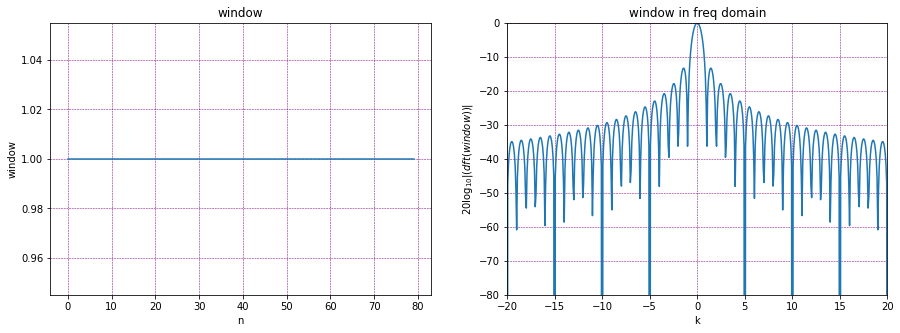

hamming window


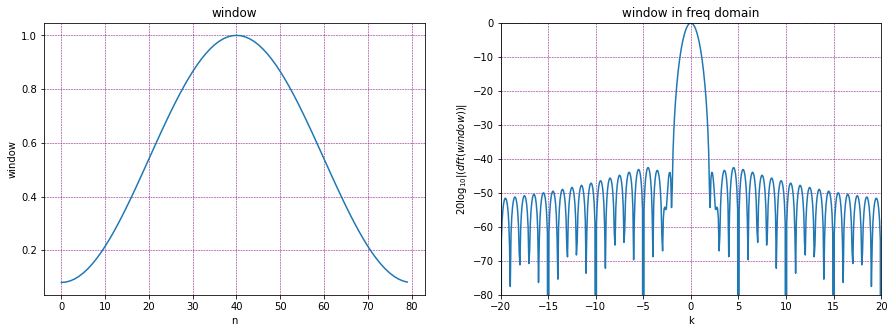

In [10]:
def win(w,M):
  """ selecting variables that keeps the middle of window
  information"""
  hm1=int(math.floor((M+1)/2))
  hm2=int(math.floor(M/2))
  N=1024                                                           # defining dft size
  hn1=int(math.floor((N+1)/2))
  hn2=int(math.floor(N/2))
  fftbuffer=np.zeros(N)                                            # Creating zero array of fft size                                                                
  """ placing window around the zero bufffer"""
  fftbuffer[:hm1]=w[hm2:]
  fftbuffer[N-hm2:]=w[:hm2]
  X=fft(fftbuffer)                                                 # taking DFT of window 
  absX=abs(X)
  """compute log of magnitude"""
  absX[absX<np.finfo(float).eps]=np.finfo(float).eps               # checking for zero values in magnitude before taking log
  mag=20*np.log10(absX)

  """for getting main lobe in the centre"""
  mag1=np.zeros(N)
  mag1[:hn1]=mag[hn1:]
  mag1[N-hn2:]=mag[:hn2]
  """ plotting window and dft"""
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(w)
  plt.grid(color='purple',linestyle='--',linewidth=0.5)
  plt.title('window')
  plt.xlabel('n')
  plt.ylabel('window')
  plt.subplot(1,2,2)
  plt.title('window in freq domain')
  plt.xlabel('k')
  plt.ylabel('$20\log_{10}|(dft(window))|$')
  plt.plot(np.arange(-hn1,hn2)/float(N)*M,mag1-max(mag1))
  plt.axis([-20,20,-80,0])
  plt.grid(color='purple',linestyle='--',linewidth=0.5)
  plt.show()


fs=16000                                                      # defining sampling frequency
duration=0.005                                                # window length in time
M=int(duration*fs)                                            # window length in terms of no. of samples 

rectangular_window=sp.get_window('boxcar',M)                  # selecting window
hanning_window=sp.get_window('hamming',M) 
print('rectangular window') 
win(rectangular_window,M)
print('hamming window')
win(hanning_window,M)









Here we are performing short time fourier transform(STFT) of one frame of input taken from the middle, which is the vowel /u/ generated for two different pitches with two different windows(Rectangular Window and Hamming Window).
Expression of STFT is as follows:


$ X(n,K)=\sum_{m\to -\infty}^{\infty} x(m)W(n-m)e^{\frac{-j2\pi}{N}Kn} $

where,

N=DFT size

X(n,K) contains both time and frequency information.

The function below performs DFT of only one frame of input with the window and gives the magnitude of output (X(n,K)).



Given window duration are:


$t_1=5ms,t_2=10ms,t_3=20ms,t_4=40ms$

for calculating length of window in terms of no. of samples(L)

$L=duration*sampling frequency$

sampling frequency, $f_s=16000H_z$

$L_1=t_1*f_s \to 5*10^{-3} * 16000=80$


$L_2=t_2*f_s \to 10*10^{-3} * 16000=160$

$L_3=t_3*f_s \to 20*10^{-3} * 16000=320$

$L_4=t_4*f_s \to 40*10^{-3} * 16000=640$

We know that,

$L< N$, so we will choose  N which is higher than all the different lengths of windows

so, N=1024 is taken 








In [ ]:
""" function for performing short time fourier transform"""
def dft(x,w,N,M):

  """ Here we give window and input sound signal along with dft 
  length and window length as input and we get windowed signal as output"""
  hn=(N//2)+1                  # size of positive spectrum including sample 0
  hm1=(np.size(w)+1)//2        # half analysis window size by rounding
  hm2=np.size(w)//2            # half analysis window size by floor
  fftbuffer=np.zeros(N)        # Initializing zero buffer of dft length
  w=w/np.sum(w)                # normalizing analysis window
  """choosing the input frame from the middle of
   input sequence of 8000 samples per sec"""
  f=4000+M                     
  x=x[4000:f]                  
  mul=x*w                      # windowing the input sequence
  """ placing the windowed sequence in the zero buffer"""
  fftbuffer[:hm1]=mul[hm2:]
  fftbuffer[-hm2:]=mul[:hm2]
  X=fft(fftbuffer)
  absX=abs(X[:hn])            # taking absolute value of output magnitude
  absX[absX<np.finfo(float).eps]=np.finfo(float).eps   # checking for zero values in magnitude before taking log
  mag=-1*20*np.log10(absX)
  return mag





# Here we will take input vowel /u/ at pitch $f_0=120H_z$

#window choosen = Rectangular window of length $L_1,L_2,L_3,L_4$

 Waveform for window length of 5 ms


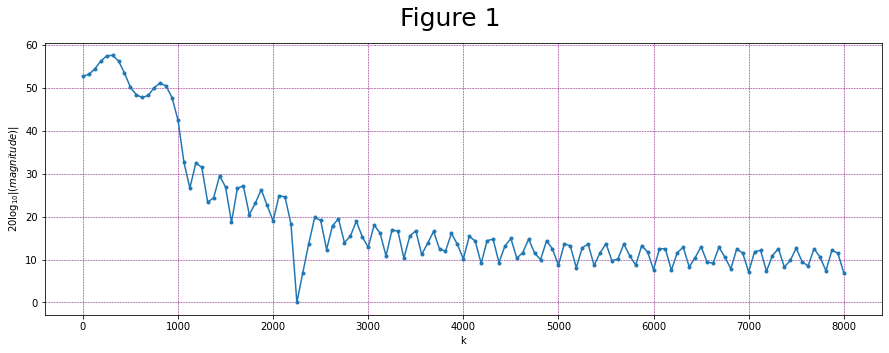

 Waveform for window length of 10 ms


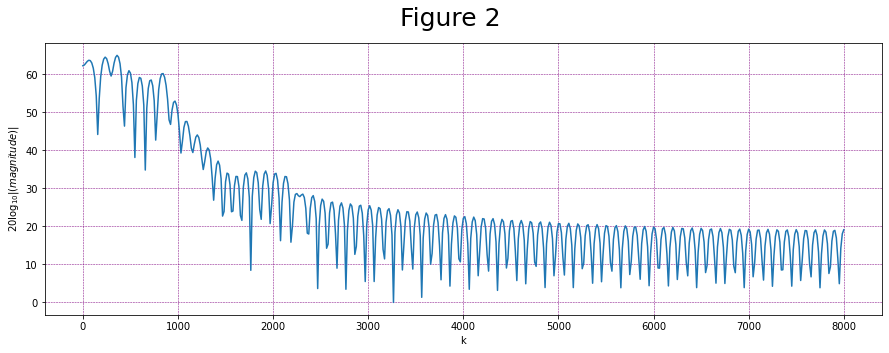

 Waveform for window length of 20 ms


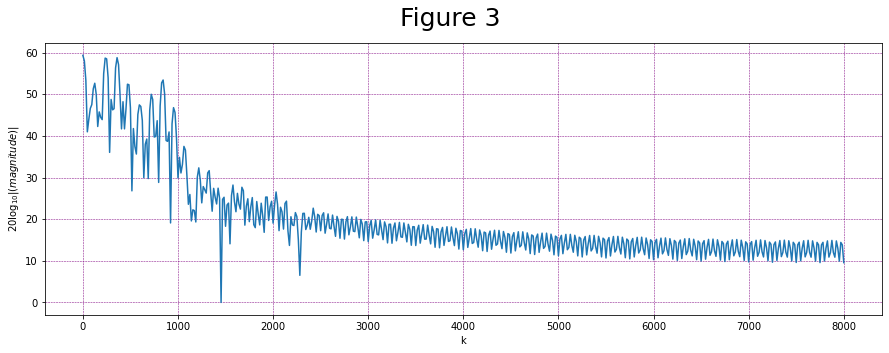

 Waveform for window length of 40 ms


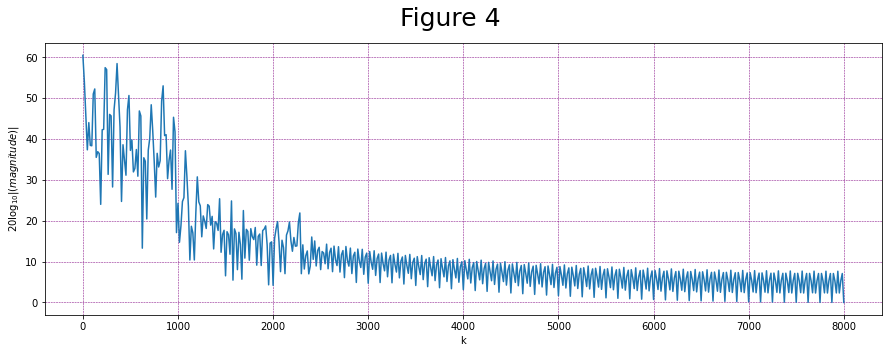

In [ ]:
""" Windowed output for window of length 5 msec"""
sound_120=y_u_120                                          # selecting vowel of pitch 120 Hz
N=256                                                      # DFT length
fs=16000                                                   # sampling frequency
duration=0.005                                             # window length
M=int(duration*fs)   # Window length                       # window length in discrete domain
rectangular_window=sp.get_window('boxcar',M)               # selecting rectangular window
x=dft(sound_120,rectangular_window,N,M)
print(' Waveform for window length of 5 ms')
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 1",fontsize = 25)
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x,'.-')
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 10 msec"""
N=1024
duration=0.01
M=int(duration*fs)
rectangular_window=sp.get_window('boxcar',M)
x=dft(sound_120,rectangular_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 2",fontsize = 25)
print(' Waveform for window length of 10 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 20 msec"""
N=1024
duration=0.02
M=int(duration*fs)
rectangular_window=sp.get_window('boxcar',M)
x=dft(sound_120,rectangular_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 3",fontsize = 25)
print(' Waveform for window length of 20 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 40 msec"""
N=1024
duration=0.04
M=int(duration*fs)
rectangular_window=sp.get_window('boxcar',M)
x=dft(sound_120,rectangular_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 4",fontsize = 25)
print(' Waveform for window length of 40 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)

plt.show()


#**Observations**

**Here we have used rectangular window for analysis  and rectangular window is not very good in Side lobe attenuation, So better observations will be made with hamming window in later part because it has good side lobe attenuation and narrow main lobe width.**

Still we can make the following observations:


**1-** As we are increasing our window length, we are moving from wide band analysis to narrow band analysis. In other words, we can also say that we are moving from better time resolution to better frequency resolution.

**2-** **In Figure 1, first two formants are clearly visible.But for obtaining the exact location of formants, we took less DFT size(N=256) in figure 1 without violating the condition $(N>L)$ , so that we can calculate the formant locations by counting the no. of samples. While for other lengths, we took N=1024 ot get the better view.**

From Figure 1:- When we take range of frequencies  $k\to(0,1000)$, we get 17 samples

so one sample frequency value  is: 

$ f=\frac{1000}{17}=58.82 H_z$

we can identify two peaks from the plot which are at 5th and 15th sample.
So we can identify two formants, third formant is not clearly visible through rectangular window becuase of distortion due to side lobes.

$F_1(First formant)=58.82*5=294.1 H_z$


$F_{1_{original}}$ of vowel /u/ is at $300 H_z$

percentage error=$\frac{|F_1-F_{1_{original}}|}{F_{1_{original}}}*100=1.96\%$

$F_2(second formant)=58.82*15=882.35 H_z$


$F_{2_{original}}$ of vowel /u/ is at $870 H_z$

percentage error=$\frac{|F_2-F_{2_{original}}|}{F_{2_{original}}}*100=1.41\%$

**3- For pitch calculation**

 Pitch is calculated by narrow band analysis. So from Figure 3 and 4, we can calculate pitch by counting the no. of peaks in a certain selected range and then divide that range value by no. of peaks to obtain the pitch of the given utterance.

We have 9 harmonics present in range $k\to(0,1000)$ which are represented by the peaks in the magnitude spectrum.

$9*F0$(Fundamental frequency or pitch)=$1000$

$F_0=\frac{1000}{9}=111.11 Hz$

$F_{0_{original}}=120Hz$

percentage error==$\frac{|F_0-F_{0_{original}}|}{F_{0_{original}}}*100=7.41\%$


# Here we will take input vowel /u/ at pitch $f_0=220H_z$

#window choosen = Rectangular window of length $L_1,L_2,L_3,L_4$

 Waveform for window length of 5 ms


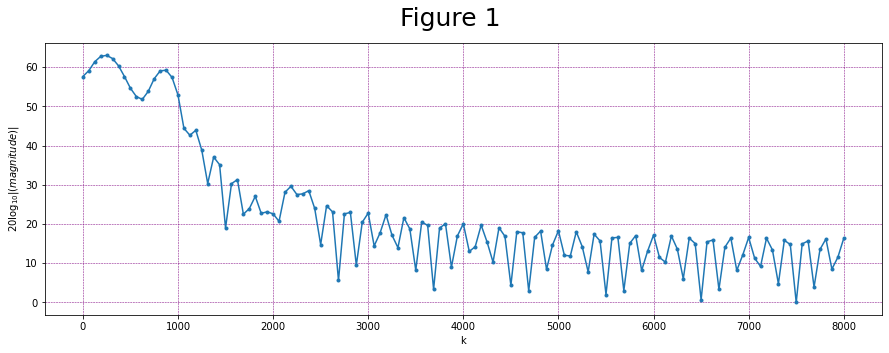

 Waveform for window length of 10 ms


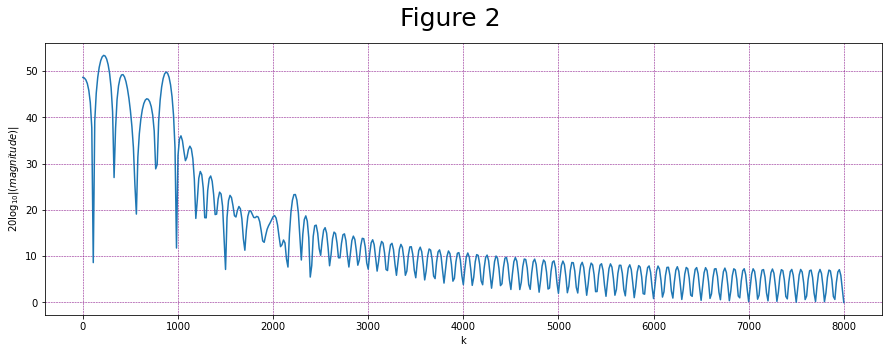

 Waveform for window length of 20 ms


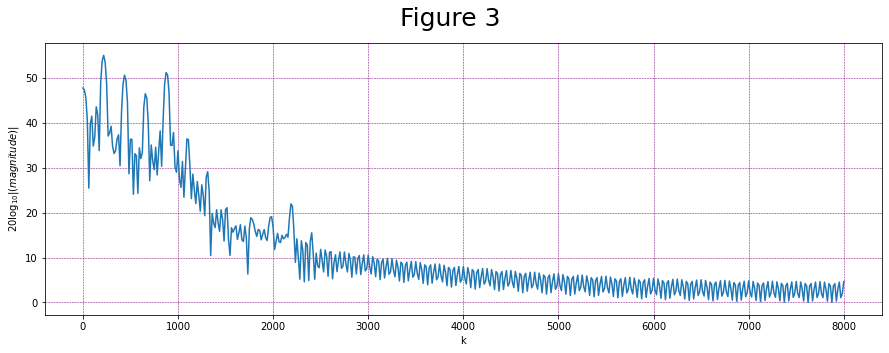

 Waveform for window length of 40 ms


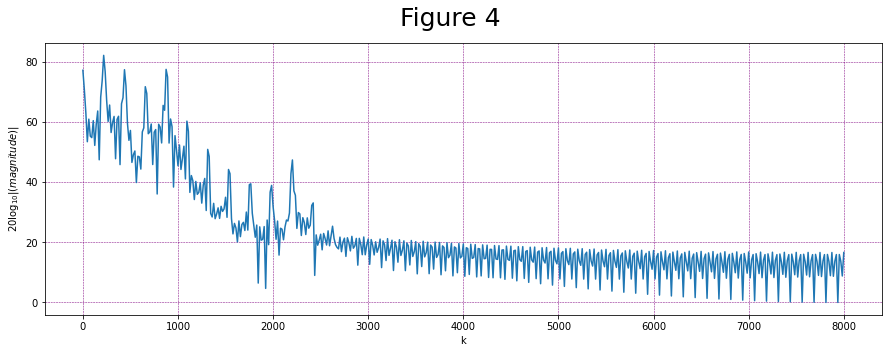

In [ ]:
""" Windowed output for window of length 5 msec"""
sound_220=y_u_220                                          # selecting vowel of pitch 220 Hz
N=256                                                      # DFT length
fs=16000                                                   # sampling frequency
duration=0.005                                             # window length
M=int(duration*fs)   # Window length                       # window length in discrete domain
rectangular_window=sp.get_window('boxcar',M)               # selecting rectangular window
x=dft(sound_220,rectangular_window,N,M)
print(' Waveform for window length of 5 ms')
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 1",fontsize = 25)
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x,'.-')
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 10 msec"""
N=1024
duration=0.01
M=int(duration*fs)
rectangular_window=sp.get_window('boxcar',M)
x=dft(sound_220,rectangular_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 2",fontsize = 25)
print(' Waveform for window length of 10 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 20 msec"""
N=1024
duration=0.02
M=int(duration*fs)
rectangular_window=sp.get_window('boxcar',M)
x=dft(sound_220,rectangular_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 3",fontsize = 25)
print(' Waveform for window length of 20 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 40 msec"""
N=1024
duration=0.04
M=int(duration*fs)
rectangular_window=sp.get_window('boxcar',M)
x=dft(sound_220,rectangular_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 4",fontsize = 25)
print(' Waveform for window length of 40 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)

plt.show()


#**Observations**
**1- Formants calculation is similar to the previous case. As we are changing our pitch from 120 Hz to 220 Hz, which is not a very significant increase. So formants are still clear in the plots obtained and we can also calculate the formant frequencies which are same as the previous calculations for 120 Hz. Although if pitch increement is high then we can face difficulties in getting exact formant location because then due to less no. of samples in the glottal pulse waveform, peaks may not coincide with formant locations of filter.**

**2- For pitch calculation**

 Pitch is calculated by narrow band analysis. So from Figure 3 and 4, we can calculate pitch by counting the no. of peaks in a certain selected range and then divide that range value by no. of peaks to obtain the pitch of the given utterance.

We have 5 harmonics present in range $k\to(0,1000)$ which are represented by the peaks in the magnitude spectrum.

$5*F0$(Fundamental frequency or pitch)=$1000$

$F_0=\frac{1000}{5}=200 Hz$

$F_{0_{original}}=220Hz$

percentage error==$\frac{|F_0-F_{0_{original}}|}{F_{0_{original}}}*100=9.09\%$

# Here we will take input vowel /u/ at pitch $f_0=120H_z$

#window choosen = Hamming window of length $L_1,L_2,L_3,L_4$

 Waveform for window length of 5 ms


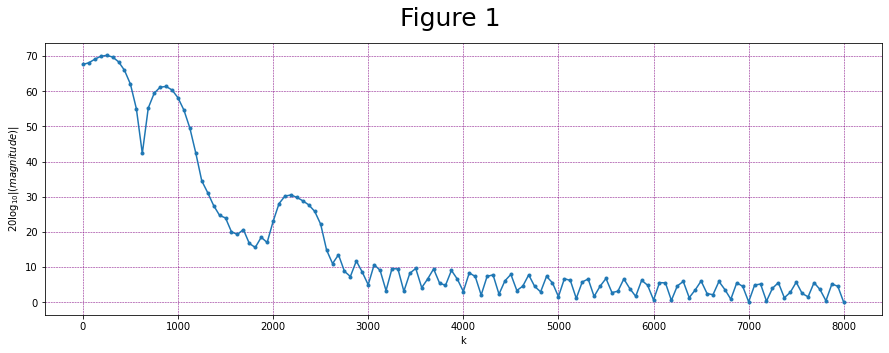

 Waveform for window length of 10 ms


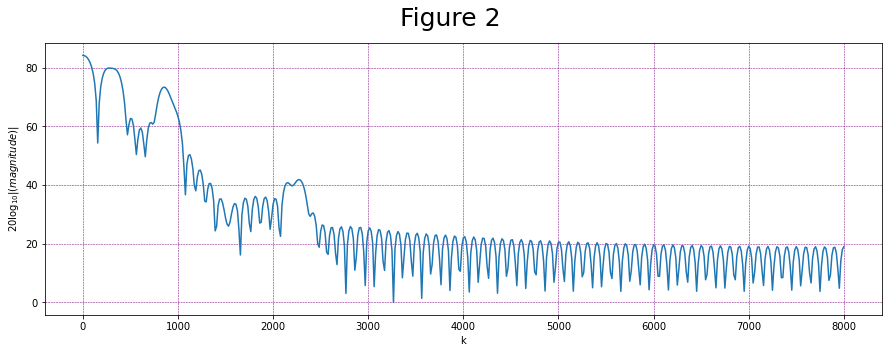

 Waveform for window length of 20 ms


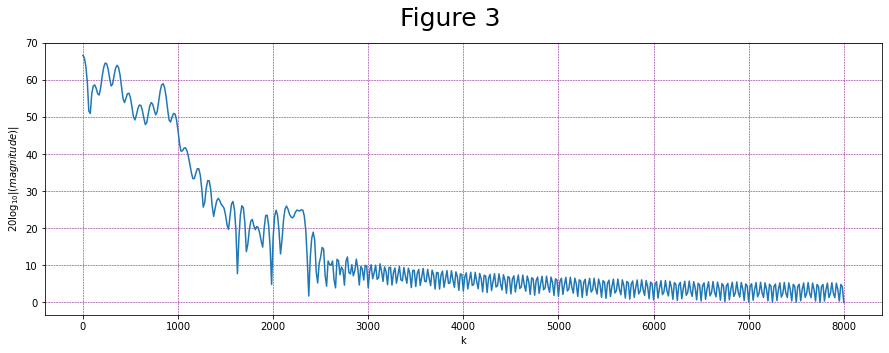

 Waveform for window length of 40 ms


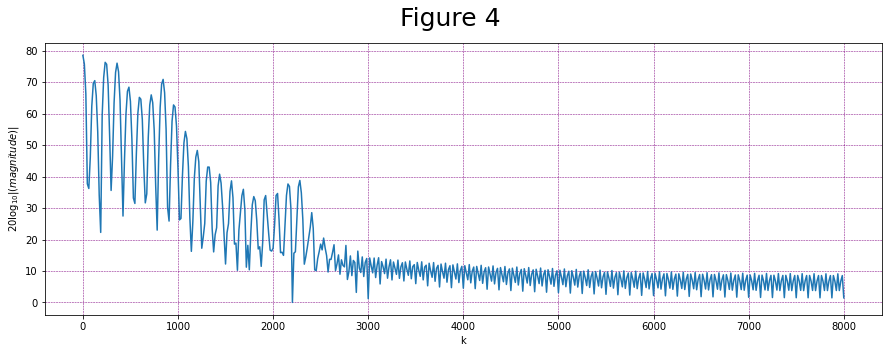

In [ ]:
""" Windowed output for window of length 5 msec"""
sound_120=y_u_120                                          # selecting vowel of pitch 120 Hz
N=256                                                      # DFT length
fs=16000                                                   # sampling frequency
duration=0.005                                             # window length
M=int(duration*fs)   # Window length                       # window length in discrete domain
hamming_window=sp.get_window('hamming',M)                  # selecting hamming window
x=dft(sound_120,hamming_window,N,M)
print(' Waveform for window length of 5 ms')
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 1",fontsize = 25)
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x,'.-')
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 10 msec"""
N=1024
duration=0.01
M=int(duration*fs)
hamming_window=sp.get_window('hamming',M)
x=dft(sound_120,hamming_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 2",fontsize = 25)
print(' Waveform for window length of 10 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 20 msec"""
N=1024
duration=0.02
M=int(duration*fs)
hamming_window=sp.get_window('hamming',M)
x=dft(sound_120,hamming_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 3",fontsize = 25)
print(' Waveform for window length of 20 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 40 msec"""
N=1024
duration=0.04
M=int(duration*fs)
hamming_window=sp.get_window('hamming',M)
x=dft(sound_120,hamming_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 4",fontsize = 25)
print(' Waveform for window length of 40 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)

plt.show()




#**Observations**

**Here we are using hamming window for analysis. As we know hamming window has smooth response and good side lobe attenuation which is clear by comparing the responses obtained from both rectangular and hamming window.**

We can make the following observations:


**1-** As we are increasing our window length, we are moving from wide band analysis to narrow band analysis. In other words, we can also say that we are moving from better time resolution to better frequency resolution.

**2-** **In Figure 1 and 2, All the three formants are clearly visible.But for obtaining the exact location of formants, we took less DFT size(N=256) in figure 1 without violating the condition $(N>L)$ , so that we can calculate the formant locations by counting the no. of samples in the selected range. While for other lengths, we took N=1024 ot get the better view.**

From Figure 1:- When we take range of frequencies  $k\to(0,1000)$, we get 17 samples

so one sample frequency value  is: 

$ f=\frac{1000}{17}=58.82 H_z$

we can identify two peaks from the plot which are at 5th and 15th sample.
So we can identify two formants, third formant is not clearly visible through rectangular window becuase of distortion due to side lobes.

$F_1(First formant)=58.82*5=294.1 H_z$


$F_{1_{original}}$ of vowel /u/ is at $300 H_z$

percentage error=$\frac{|F_1-F_{1_{original}}|}{F_{1_{original}}}*100=1.96\%$

$F_2(second formant)=58.82*15=882.35 H_z$


$F_{2_{original}}$ of vowel /u/ is at $870 H_z$

percentage error=$\frac{|F_2-F_{2_{original}}|}{F_{2_{original}}}*100=1.41\%$


$F_3(second formant)=58.82*4+2000= 2235.28 H_z$


$F_{2_{original}}$ of vowel /u/ is at $2249 H_z$

percentage error=$\frac{|F_2-F_{2_{original}}|}{F_{2_{original}}}*100=0.2\%$


**Observation from percentage error obtained**


As we are moving to higher formants percentage error in locating the formants is decreasing because at higher frequencies harmonics of fundamental frequencies are getting weaker, so they are not coinciding with the formant locations. As we can see, at lower frequencies there are many peaks due to harmonics so finding the exact location of formants at lower frequencies is difficult. Thats why error is high at lower frequencies.



**3- For pitch calculation**

 Pitch is calculated by narrow band analysis. So from Figure 3 and 4, we can calculate pitch by counting the no. of peaks in a certain selected range and then divide that range value by no. of peaks to obtain the pitch of the given utterance.

We have 9 harmonics present in range $k\to(0,1000)$ which are represented by the peaks in the magnitude spectrum.

$9*F0$(Fundamental frequency or pitch)=$1000$

$F_0=\frac{1000}{9}=111.11 Hz$

$F_{0_{original}}=120Hz$

percentage error==$\frac{|F_0-F_{0_{original}}|}{F_{0_{original}}}*100=7.41\%$


# Here we will take input vowel /u/ at pitch $f_0=220H_z$

#window choosen = Hamming window of length $L_1,L_2,L_3,L_4$

 Waveform for window length of 5 ms


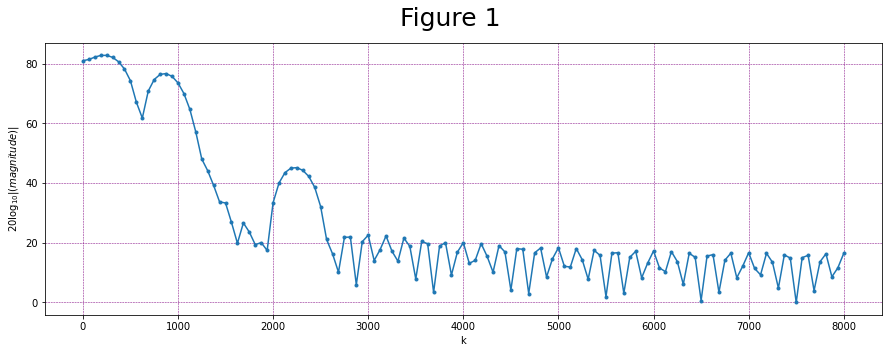

 Waveform for window length of 10 ms


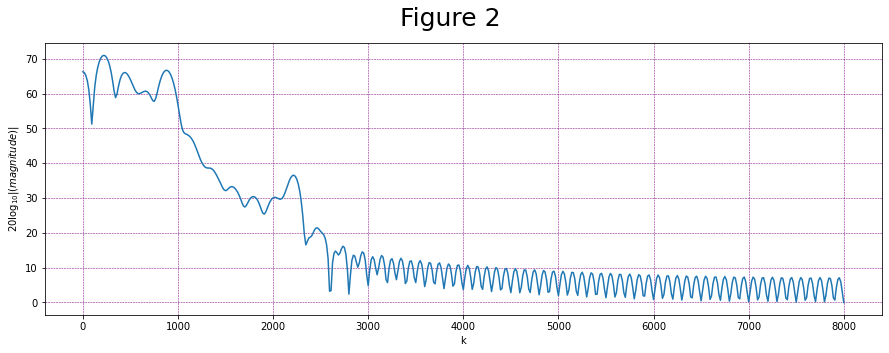

 Waveform for window length of 20 ms


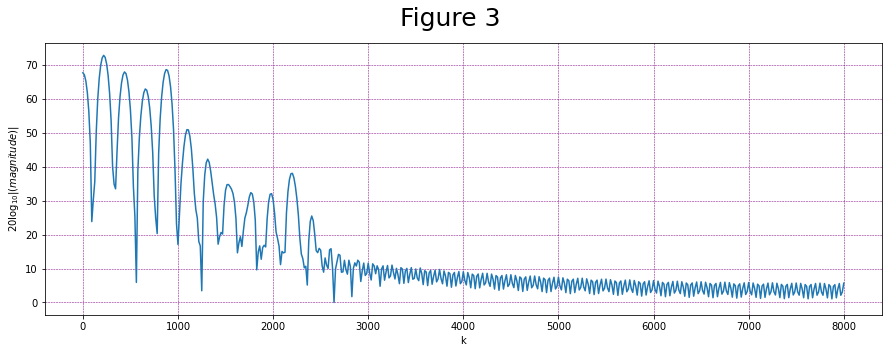

 Waveform for window length of 40 ms


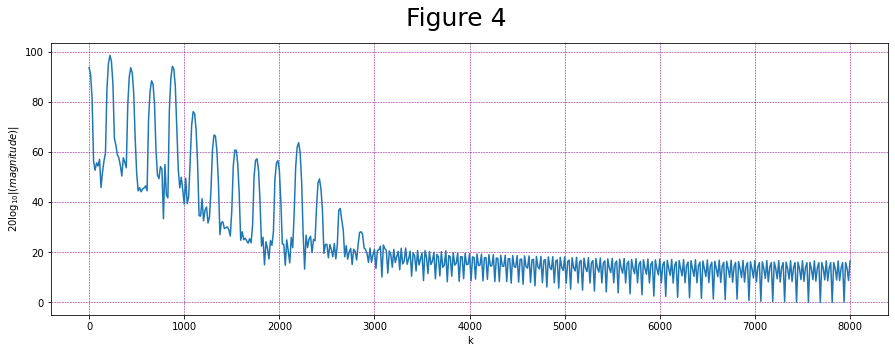

In [ ]:
""" Windowed output for window of length 5 msec"""
sound_220=y_u_220                                          # selecting vowel of pitch 220 Hz
N=256                                                      # DFT length
fs=16000                                                   # sampling frequency
duration=0.005                                             # window length
M=int(duration*fs)   # Window length                       # window length in discrete domain
hamming_window=sp.get_window('hamming',M)                  # selecting hamming window
x=dft(sound_220,hamming_window,N,M)
print(' Waveform for window length of 5 ms')
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 1",fontsize = 25)
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x,'.-')
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 10 msec"""
N=1024
duration=0.01
M=int(duration*fs)
hamming_window=sp.get_window('hamming',M)
x=dft(sound_220,hamming_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 2",fontsize = 25)
print(' Waveform for window length of 10 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 20 msec"""
N=1024
duration=0.02
M=int(duration*fs)
hamming_window=sp.get_window('hamming',M)
x=dft(sound_220,hamming_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 3",fontsize = 25)
print(' Waveform for window length of 20 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)
plt.show()

"""Windowed output for window of length 40 msec"""
N=1024
duration=0.04
M=int(duration*fs)
hamming_window=sp.get_window('hamming',M)
x=dft(sound_220,hamming_window,N,M)
figure=plt.figure(figsize=(15,5))
figure.suptitle("Figure 4",fontsize = 25)
print(' Waveform for window length of 40 ms')
plt.plot(np.arange(0,(fs/2)+1,fs/float(N)),max(x)-x)
plt.xlabel('k')
plt.ylabel('$20\log_{10}|(magnitude)|$')
plt.grid(color='purple',linestyle='--',linewidth=0.5)

plt.show()






#Observations

**1- Formants calculation is similar to the previous case. As we are changing our pitch from 120 Hz to 220 Hz, which is not a very significant increase. So formants are still clear in the plots obtained and we can also calculate the formant frequencies which are same as the previous calculations for 120 Hz. Although if pitch increement is high then we can face difficulties in getting exact formant location.**

**2- For pitch calculation**

 Pitch is calculated by narrow band analysis. So from Figure 3 and 4, we can calculate pitch by counting the no. of peaks in a certain selected range and then divide that range value by no. of peaks to obtain the pitch of the given utterance.

We have 5 harmonics present in range $k\to(0,1000)$ which are represented by the peaks in the magnitude spectrum.

$5*F0$(Fundamental frequency or pitch)=$1000$

$F_0=\frac{1000}{5}=200 Hz$

$F_{0_{original}}=220Hz$

percentage error==$\frac{|F_0-F_{0_{original}}|}{F_{0_{original}}}*100=9.09\%$